# CausalNex Implementation of Wine Dataset

Importing Libraries and downloading the pre requistes

In [6]:

pip install matplotlib


     ---------------------------------------- 7.2/7.2 MB 789.5 kB/s eta 0:00:00
     ------------------------------------ 965.4/965.4 kB 623.4 kB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 1.0 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.4-cp38-cp38-win_amd64.whl (55 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ------------------------------------ 164.0/164.0 kB 273.7 kB/s eta 0:00:00


In [1]:
import pandas as pd
import causalnex
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
data = pd.read_csv('winequalityN.csv')
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Data Processing

The problem is to determine the quality of a wine based on the given features above. Since CausalNex and bayesian networks work on data that is in discrete states. We initally fill missing data and then use the CasualNex discretiser to partition the data based on data concentrations we find in its visualisations.

In [3]:
data.apply(lambda x: sum(x.isnull()),axis=0)

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [4]:
#fill numerical columns to avoid null error

data['fixed acidity'].fillna(data['fixed acidity'].mean(), inplace=True)
data['volatile acidity'].fillna(data['volatile acidity'].mean(), inplace=True)
data['citric acid'].fillna(data['citric acid'].mean(), inplace=True)
data['residual sugar'].fillna(data['residual sugar'].mean(), inplace=True)
data['chlorides'].fillna(data['chlorides'].mean(), inplace=True)
data['pH'].fillna(data['pH'].mean(), inplace=True)
data['sulphates'].fillna(data['sulphates'].mean(), inplace=True)

# Visualisation

In [5]:
puredata = data
data = data.drop(columns=['quality'])

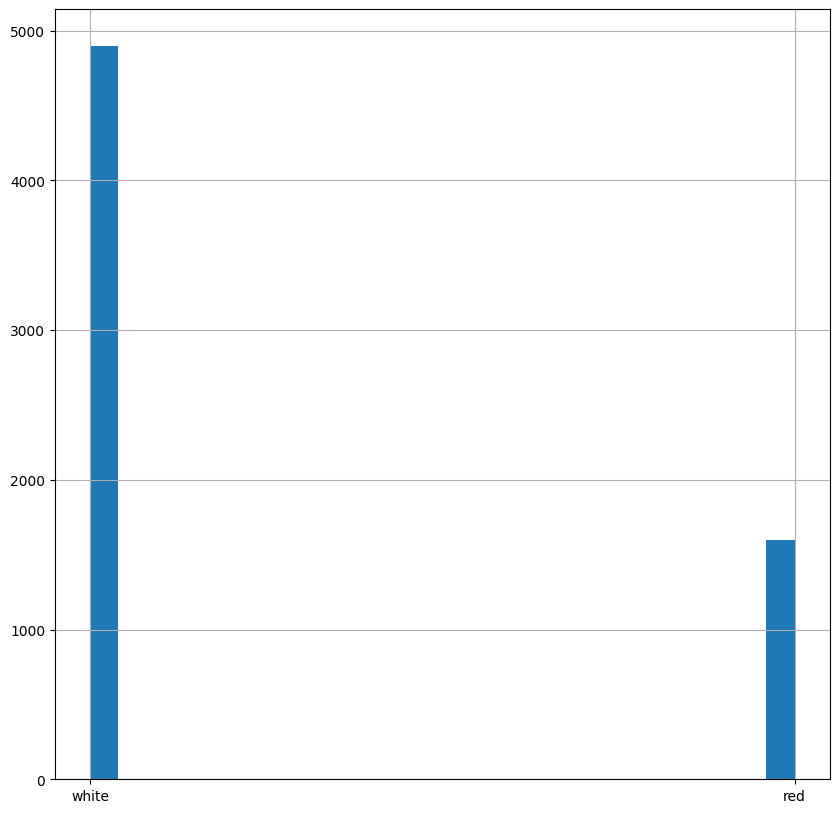

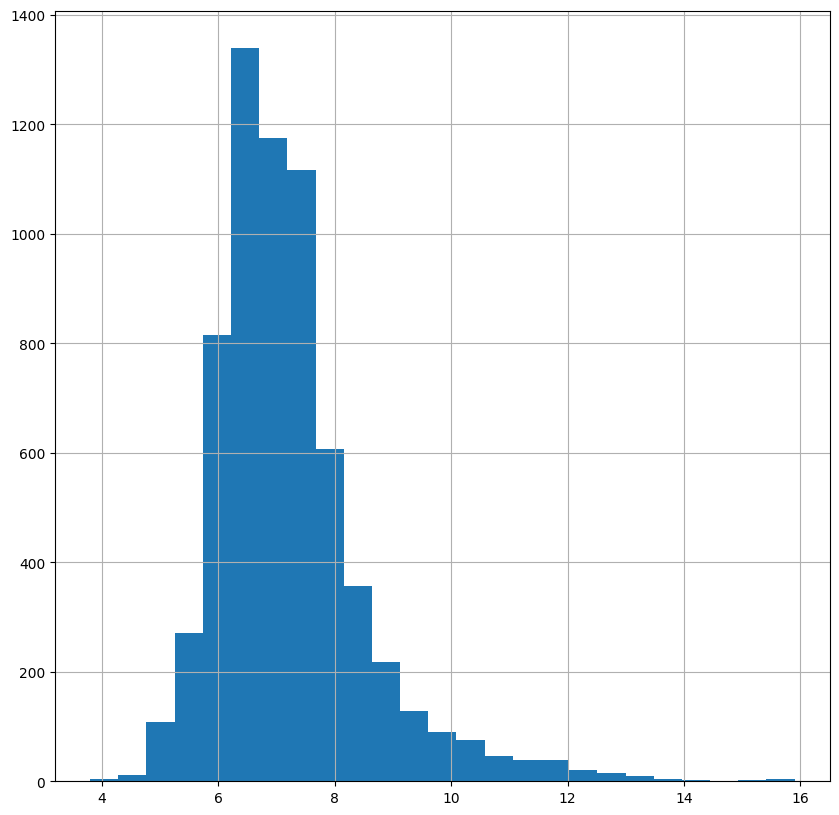

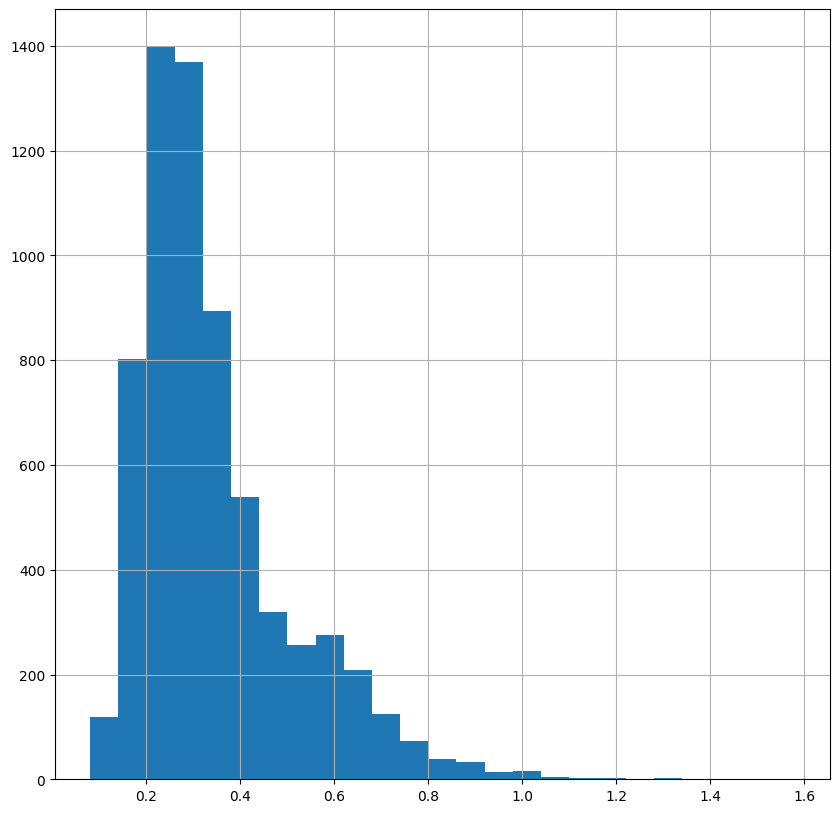

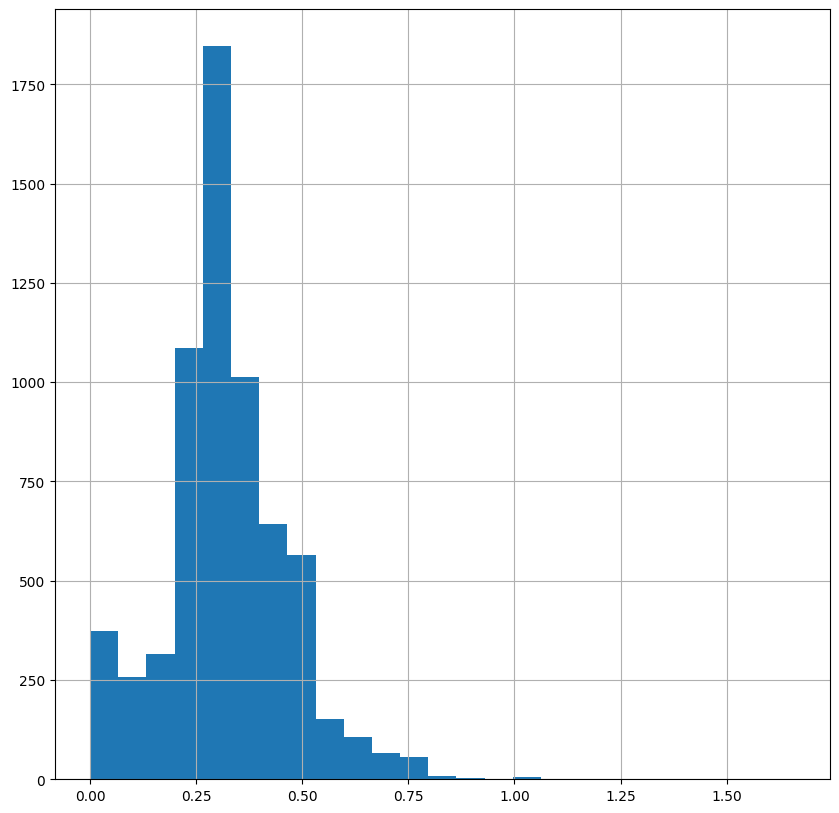

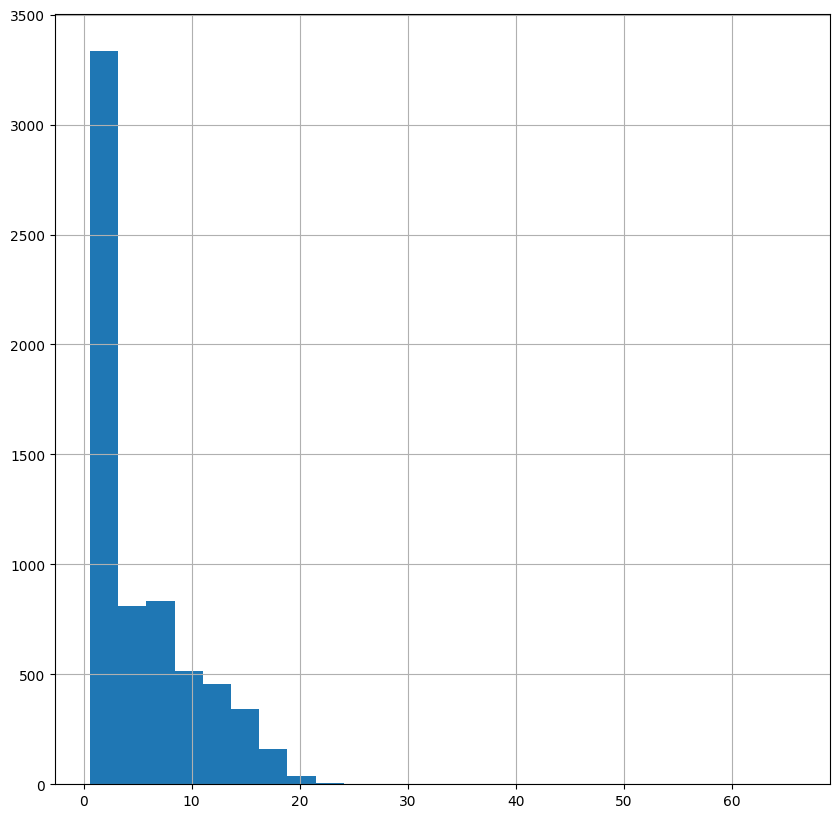

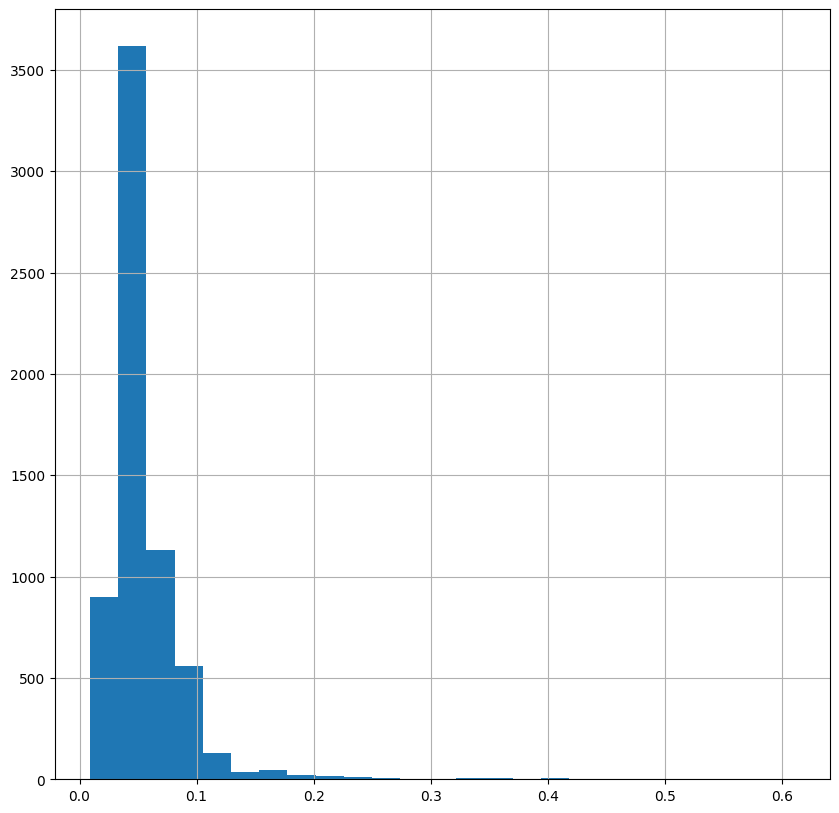

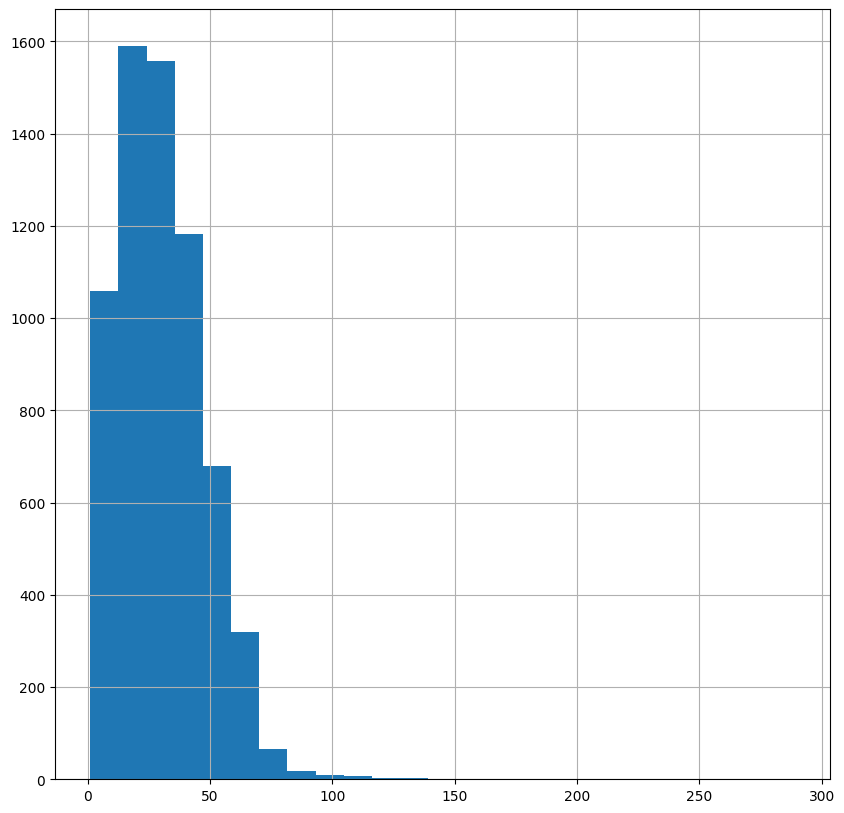

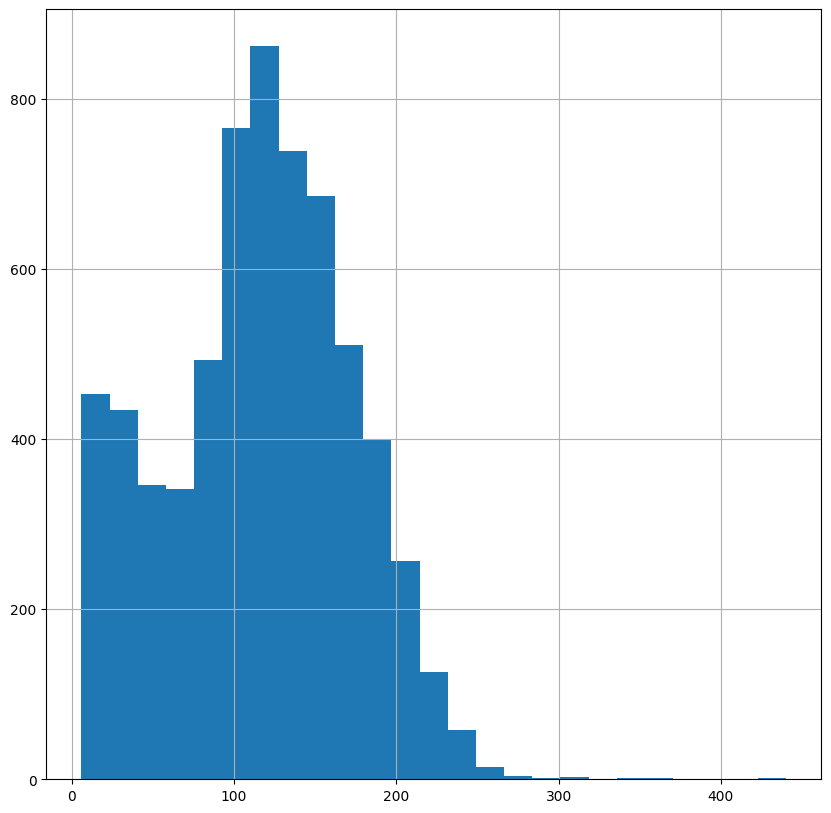

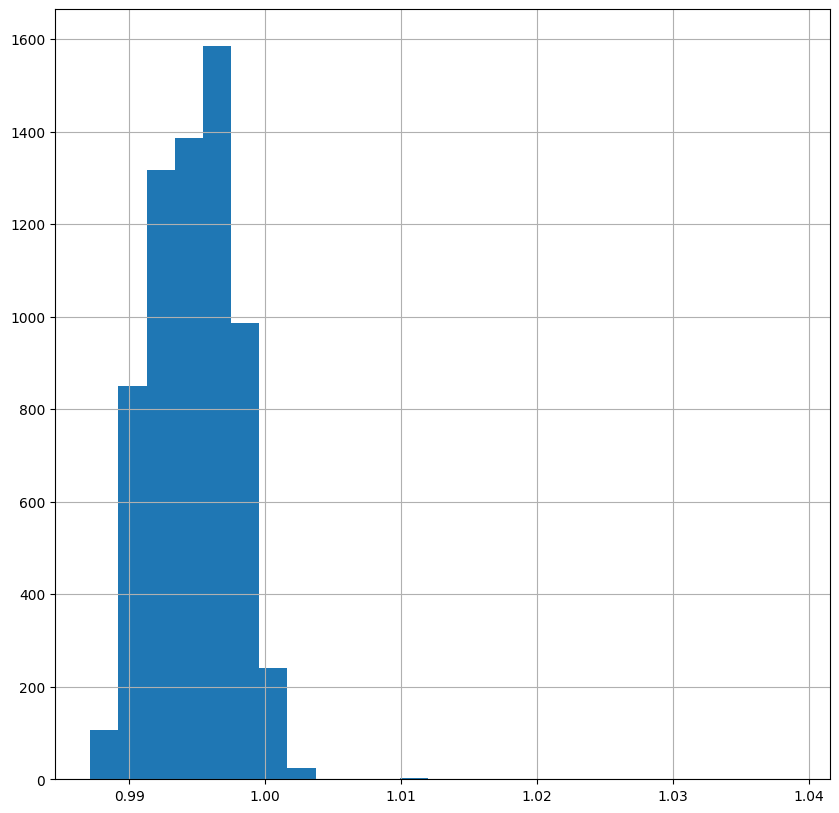

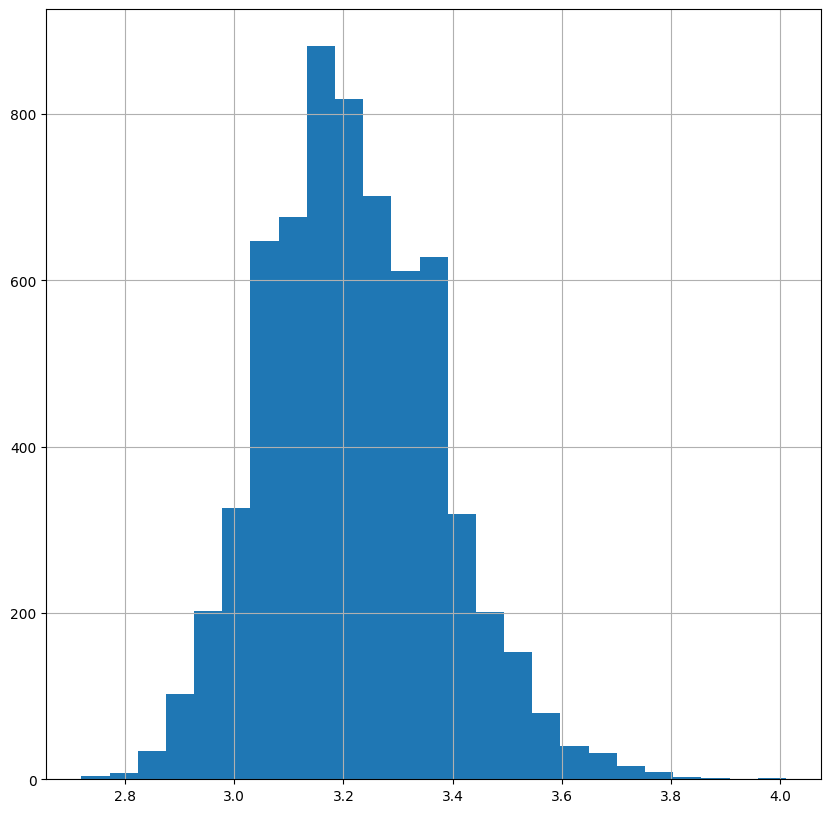

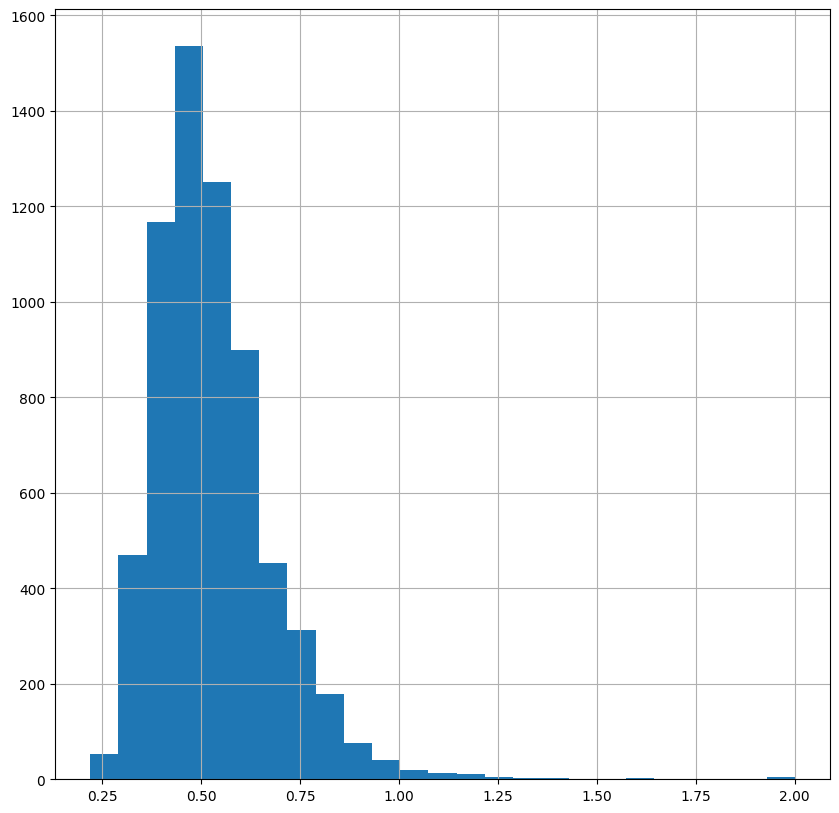

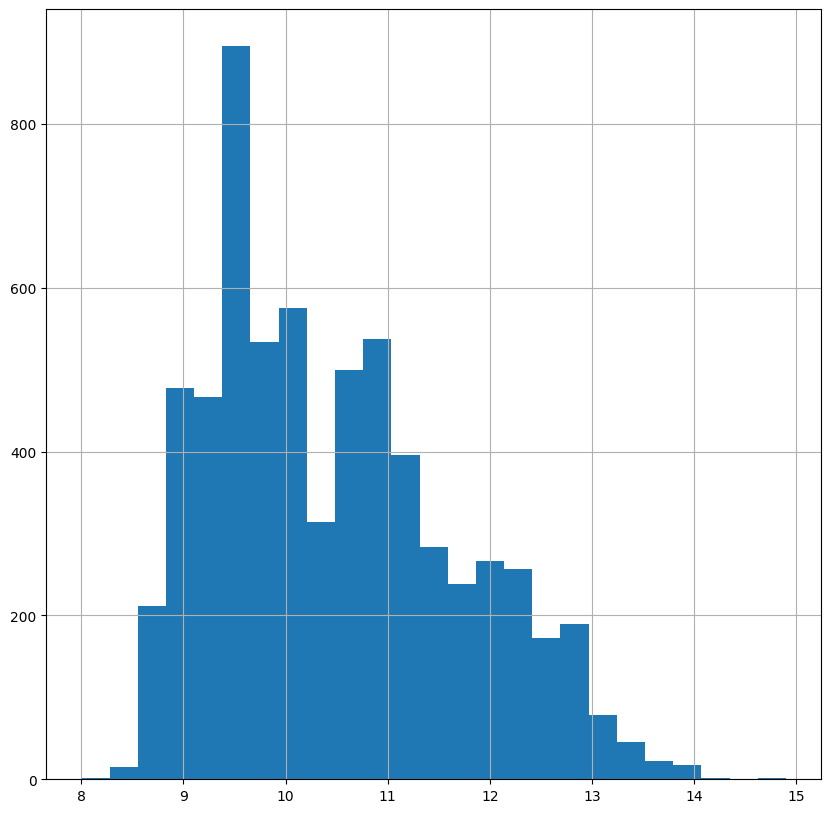

In [6]:
for column in data.columns:
    data[column].hist(bins=25,figsize=(10,10))
    plt.show()
# display histogram



In [7]:
from causalnex.discretiser import Discretiser
discretised_data = puredata.copy()

discretised_data["fixed acidity"] = Discretiser(method="fixed",
                          numeric_split_points=[8]).transform(discretised_data["fixed acidity"].values)
discretised_data["volatile acidity"] = Discretiser(method="fixed",
                          numeric_split_points=[0.2,0.4]).transform(discretised_data["volatile acidity"].values)
discretised_data["citric acid"] = Discretiser(method="fixed",
                          numeric_split_points=[0.35]).transform(discretised_data["citric acid"].values)
discretised_data["residual sugar"] = Discretiser(method="fixed",
                          numeric_split_points=[8]).transform(discretised_data["residual sugar"].values)
discretised_data["chlorides"] = Discretiser(method="fixed",
                          numeric_split_points=[0.05]).transform(discretised_data["chlorides"].values)
discretised_data["free sulfur dioxide"] = Discretiser(method="fixed",
                          numeric_split_points=[40]).transform(discretised_data["free sulfur dioxide"].values)
discretised_data["total sulfur dioxide"] = Discretiser(method="fixed",
                          numeric_split_points=[110]).transform(discretised_data["total sulfur dioxide"].values)
discretised_data["density"] = Discretiser(method="fixed",
                          numeric_split_points=[0.995]).transform(discretised_data["density"].values)
discretised_data["pH"] = Discretiser(method="fixed",
                          numeric_split_points=[3.2]).transform(discretised_data["pH"].values)
discretised_data["sulphates"] = Discretiser(method="fixed",
                          numeric_split_points=[0.5]).transform(discretised_data["sulphates"].values)
discretised_data["alcohol"] = Discretiser(method="fixed",
                          numeric_split_points=[10.5]).transform(discretised_data["alcohol"].values)
alterdata = discretised_data.copy()

In [8]:
discretised_data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,0,1,1,1,0,1,1,1,0,0,0,6
1,white,0,1,0,0,0,0,1,0,1,0,0,6
2,white,1,1,1,0,1,0,0,1,1,0,0,6
3,white,0,1,0,1,1,1,1,1,0,0,0,6
4,white,0,1,0,1,1,1,1,1,0,0,0,6


Now we create a map to make the discretised states more readable

In [9]:
volatile_map = {0: "low", 1: "med", 2: "high"}
fixed_map = {0:"low",1:"high"}
chlor_map = {0:"less chlorides",1:"more chlorides"}
cit_map = {0:"less citric",1:"more citric"}
tot_map = {0:"low tot SO2",1:"high tot SO2"}
free_map = {0:"low free SO2",1:"high free SO2"}
res_map = {0:"less sugars",1:"more sugars"}
dense_map = {0:"low density",1:"high density"}
alcohol_map = {0:"low alcohol",1:"high alcohol"}
ph_map = {0:"strong acid",1:"weak acid"}
sulp_map = {0:"less sulphates",1:"more sulphates"}



In [15]:
alterdata["fixed acidity"] = discretised_data["fixed acidity"].map(fixed_map)
alterdata["volatile acidity"] = discretised_data["volatile acidity"].map(volatile_map)
alterdata["citric acid"] = discretised_data["citric acid"].map(cit_map)
alterdata["residual sugar"] = discretised_data["residual sugar"].map(res_map)
alterdata["chlorides"] = discretised_data["chlorides"].map(chlor_map)
alterdata["free sulfur dioxide"] = discretised_data["free sulfur dioxide"].map(free_map)
alterdata["total sulfur dioxide"] = discretised_data["total sulfur dioxide"].map(tot_map)
alterdata["density"] = discretised_data["density"].map(dense_map)
alterdata["pH"] = discretised_data["pH"].map(ph_map)
alterdata["sulphates"] = discretised_data["sulphates"].map(sulp_map)
alterdata["alcohol"] = discretised_data["alcohol"].map(alcohol_map)

print(alterdata.head())

    type fixed acidity volatile acidity  citric acid residual sugar  \
0  white           low              med  more citric    more sugars   
1  white           low              med  less citric    less sugars   
2  white          high              med  more citric    less sugars   
3  white           low              med  less citric    more sugars   
4  white           low              med  less citric    more sugars   

        chlorides free sulfur dioxide total sulfur dioxide       density  \
0  less chlorides       high free SO2         high tot SO2  high density   
1  less chlorides        low free SO2         high tot SO2   low density   
2  more chlorides        low free SO2          low tot SO2  high density   
3  more chlorides       high free SO2         high tot SO2  high density   
4  more chlorides       high free SO2         high tot SO2  high density   

            pH       sulphates      alcohol  quality  
0  strong acid  less sulphates  low alcohol        6  
1    w

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

discretised_data['type'] = le.fit_transform(discretised_data['type'])



In [12]:
discretised_data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,0,1,1,1,0,1,1,1,0,0,0,6
1,1,0,1,0,0,0,0,1,0,1,0,0,6
2,1,1,1,1,0,1,0,0,1,1,0,0,6
3,1,0,1,0,1,1,1,1,1,0,0,0,6
4,1,0,1,0,1,1,1,1,1,0,0,0,6


In [13]:
from causalnex.structure.notears import from_pandas

sm = from_pandas(discretised_data)

In [14]:
import networkx as nx

import matplotlib as mpl

mpl.rcParams["figure.dpi"] = 120


# Creating the Structured Model

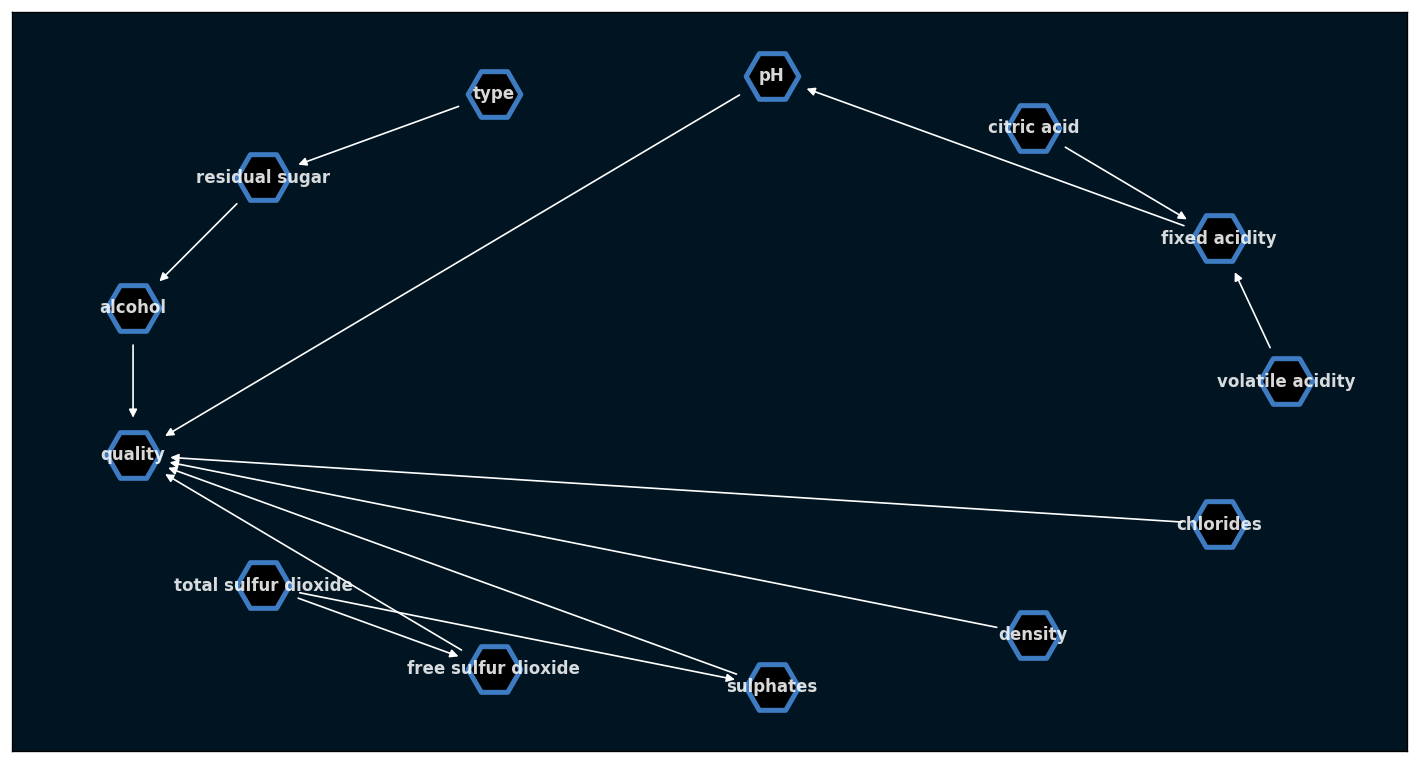

In [17]:
causal_graph = nx.DiGraph([('volatile acidity', 'fixed acidity'), ('citric acid', 'fixed acidity'),('fixed acidity','pH'),
                           ('type','residual sugar'),('residual sugar','alcohol'),('alcohol','quality')
                          ,('pH','quality'), ('total sulfur dioxide','free sulfur dioxide'),('free sulfur dioxide','quality')
                          ,('total sulfur dioxide','sulphates'),('sulphates','quality'),('density','quality'),('chlorides','quality')])

fig = plt.figure(figsize=(15, 8))  # set figsize
ax = fig.add_subplot(1, 1, 1)
ax.set_facecolor("#001521")  # set backgrount

pos = nx.drawing.layout.circular_layout(causal_graph)

nx.draw_networkx_nodes(
    causal_graph,
    pos,
    node_shape="H",
    node_size=1000,
    linewidths=3,
    edgecolors="#4a90e2d9",
    node_color=["black"],
)
# add labels
nx.draw_networkx_labels(
    causal_graph,
    pos,
    font_color="#FFFFFFD9",
    font_weight="bold",
    
    font_size=10,
)
# add edges
nx.draw_networkx_edges(
    causal_graph,
    pos,
    edge_color="white",
    node_shape="H",
    node_size=2000,
    
    width=[1],
)


The type of wine normally determines the residual sugars present in it. The lesser the sugar, the more alcohol in it. 

SO2 content also directly influences a wine as it protects it from bacterial growth. Extreme pH levels can also make a wine undesirable as well as unwanted acidity.

Keeping all these factors in mind we can create out DAG (directed acyclic graph)

In [18]:
from causalnex.structure import StructureModel

sm2 = StructureModel()
sm2.add_edge('volatile acidity', 'fixed acidity')
sm2.add_edge('citric acid', 'fixed acidity')
sm2.add_edge('fixed acidity','quality')
sm2.add_edge('type','residual sugar')
sm2.add_edge('residual sugar','alcohol')
sm2.add_edge('alcohol','quality')
sm2.add_edge('total sulfur dioxide','free sulfur dioxide')
sm2.add_edge('free sulfur dioxide','quality')
sm2.add_edge('total sulfur dioxide','sulphates')
sm2.add_edge('sulphates','quality')
sm2.add_edge('density','quality')
sm2.add_edge('chlorides','quality')
sm2.add_edge('fixed acidity','pH')


# Creating the Bayesian Network

In [19]:
from causalnex.network import BayesianNetwork
bn = BayesianNetwork(sm2)

In [20]:
bn = bn.fit_node_states(discretised_data)

In [27]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(discretised_data, train_size=0.75, test_size=0.25, random_state=7)
print(test.head())

      type  fixed acidity  volatile acidity  citric acid  residual sugar  \
1015     1              0                 1            0               0   
5823     0              1                 1            1               0   
5446     0              1                 1            1               0   
2866     1              0                 0            1               0   
1320     1              0                 0            1               0   

      chlorides  free sulfur dioxide  total sulfur dioxide  density  pH  \
1015          0                    0                     1        0   0   
5823          1                    1                     0        1   1   
5446          1                    0                     0        1   0   
2866          0                    0                     1        0   1   
1320          0                    0                     1        0   0   

      sulphates  alcohol  quality  
1015          0        0        5  
5823          1     

In [22]:
bn = bn.fit_cpds(train, method="BayesianEstimator", bayes_prior="K2")

Below we can see the conditional probability distribution for "quality" based on all factors.

In [23]:
bn.cpds["quality"]

alcohol                     0                                          \
chlorides                   0                                           
density                     0                                           
fixed acidity               0                                       1   
free sulfur dioxide         0                   1                   0   
sulphates                   0         1         0         1         0   
quality                                                                 
3                    0.006757  0.006536  0.022727  0.038462  0.058824   
4                    0.054054  0.039216  0.045455  0.057692  0.117647   
5                    0.459459  0.326797  0.477273  0.250000  0.323529   
6                    0.398649  0.470588  0.363636  0.423077  0.352941   
7                    0.054054  0.143791  0.045455  0.192308  0.088235   
8                    0.020270  0.006536  0.022727  0.019231  0.029412   
9                    0.006757  0.006536  0.022727  0.019231  0.029412   

alcohol                                                           ...    1  \
chlorides                                                         ...    1   
density                                              1            ...    0   
fixed acidity                                        0            ...    1   
free sulfur dioxide              1                   0            ...    1   
sulphates                   1    0         1         0         1  ...    0   
quality                                                           ...        
3                    0.045455  0.1  0.090909  0.018018  0.008850  ...  0.1   
4                    0.090909  0.1  0.090909  0.036036  0.026549  ...  0.1   
5                    0.181818  0.1  0.090909  0.387387  0.230088  ...  0.2   
6                    0.500000  0.4  0.454545  0.504505  0.610619  ...  0.3   
7                    0.090909  0.1  0.090909  0.036036  0.106195  ...  0.1   
8                    0.045455  0.1  0.090909  0.009009  0.008850  ...  0.1   
9                    0.045455  0.1  0.090909  0.009009  0.008850  ...  0.1   

alcohol                                                                      \
chlorides                                                                     
density                      1                                                
fixed acidity                0                                  1             
free sulfur dioxide          0              1                   0             
sulphates              1     0         1    0         1         0         1   
quality                                                                       
3                    0.1  0.04  0.007937  0.1  0.117647  0.153846  0.009950   
4                    0.1  0.04  0.055556  0.1  0.058824  0.076923  0.014925   
5                    0.1  0.28  0.246032  0.4  0.176471  0.307692  0.179104   
6                    0.3  0.52  0.507937  0.1  0.470588  0.076923  0.477612   
7                    0.1  0.04  0.166667  0.1  0.058824  0.230769  0.298507   
8                    0.2  0.04  0.007937  0.1  0.058824  0.076923  0.014925   
9                    0.1  0.04  0.007937  0.1  0.058824  0.076923  0.004975   

alcohol                                  
chlorides                                
density                                  
fixed acidity                            
free sulfur dioxide         1            
sulphates                   0         1  
quality                                  
3                    0.142857  0.083333  
4                    0.142857  0.083333  
5                    0.142857  0.083333  
6                    0.142857  0.333333  
7                    0.142857  0.250000  
8                    0.142857  0.083333  
9                    0.142857  0.083333  

[7 rows x 64 columns]

An example with a prediction and the ground truth given below

In [28]:
alterdata.loc[1015, discretised_data.columns != 'quality']

type                             white
fixed acidity                      low
volatile acidity                   med
citric acid                less citric
residual sugar             less sugars
chlorides               less chlorides
free sulfur dioxide       low free SO2
total sulfur dioxide      high tot SO2
density                    low density
pH                         strong acid
sulphates               less sulphates
alcohol                    low alcohol
Name: 1015, dtype: object

In [29]:
predictions = bn.predict(test, "quality")
print(f"The prediction is '{predictions.loc[1015, 'quality_prediction']}'")

The prediction is '5'


In [30]:
print(f"The ground truth is '{test.loc[1015, 'quality']}'")

The ground truth is '5'


# Performance

In [69]:
from causalnex.evaluation import classification_report

classification_report(bn, test, "quality")

{'quality_3': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 8},
 'quality_4': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 60},
 'quality_5': {'precision': 0.5509259259259259,
  'recall': 0.65625,
  'f1-score': 0.598993288590604,
  'support': 544},
 'quality_6': {'precision': 0.47530186608122943,
  'recall': 0.6367647058823529,
  'f1-score': 0.5443117536140791,
  'support': 680},
 'quality_7': {'precision': 0.4,
  'recall': 0.09285714285714286,
  'f1-score': 0.15072463768115943,
  'support': 280},
 'quality_8': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 52},
 'quality_9': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1},
 'accuracy': 0.5021538461538462,
 'macro avg': {'precision': 0.20374682742959363,
  'recall': 0.19798169267707083,
  'f1-score': 0.18486138284083467,
  'support': 1625},
 'weighted avg': {'precision': 0.4522516754701168,
  'recall': 0.5021538461538462,
  'f1-score': 0.45426907077020734,
  '

In [70]:
from causalnex.evaluation import roc_auc
roc, auc = roc_auc(bn, test, "quality")
print(auc)

0.8802196134122289
